<a href="https://www.kaggle.com/code/satyammchaturvedi/mnist-pca?scriptVersionId=249000592" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
26633,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


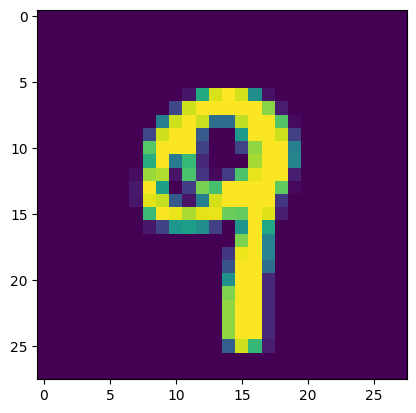

In [5]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[2415, 1:].values.reshape(28,28))
# iloc 18306 is row, and from 1 onwards its a column , it converts into 28*28 shape

In [6]:
x = df.iloc[:, 1:]   # Features from column 1 onward
y = df.iloc[:, 0]    # Labels in column 0

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier()

In [10]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [11]:
import time
start = time.time()
y_pred = knn.predict(x_test)
print(time.time() - start)

12.541062593460083


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [13]:
# Standerdize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [15]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [16]:
x_train_trf= pca.fit_transform(x_train)
x_test_trf= pca.transform(x_test)

In [17]:
x_train.shape
x_train_trf.shape

(33600, 200)

In [18]:
knn = KNeighborsClassifier()

In [19]:
knn.fit(x_train_trf, y_train)

KNeighborsClassifier()

In [20]:
y_pred = knn.predict(x_test_trf)

In [21]:
accuracy_score(y_test, y_pred)

0.9510714285714286

In [22]:
for i in range(1, 10):
    # PCA 
    pca = PCA(n_components=i)

    x_train_trf= pca.fit_transform(x_train)
    x_test_trf= pca.transform(x_test)

    knn = KNeighborsClassifier()
    
    knn.fit(x_train_trf, y_train)

    y_pred = knn.predict(x_test_trf)

    print(i,  accuracy_score(y_test, y_pred));
    
    

1 0.2580952380952381
2 0.32416666666666666
3 0.5103571428571428
4 0.6661904761904762
5 0.7376190476190476
6 0.8227380952380953
7 0.8430952380952381
8 0.8725
9 0.8871428571428571


In [23]:
pca = PCA(n_components = 3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [24]:
x_train_trf

array([[-2.71865015, -0.48984572,  1.13663532],
       [-0.67696272, -6.75340751, -2.33662039],
       [-3.03322726,  6.50988849,  7.49106322],
       ...,
       [ 2.14881255,  0.78106591, -0.74744781],
       [ 1.05952733,  0.94772549,  3.95131046],
       [17.70247482,  1.96228164, -4.94138884]])

In [25]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(x = x_train_trf[:,0],
                 y = x_train_trf[:,1],
                 z = x_train_trf[:,2],
                 color = y_train_trf,
                 color_discrete_sequence = px.colors.qualitative.G10
                )
fig.show()

In [26]:
pca.explained_variance_
# Eigen Values 


array([40.67111197, 29.17023397, 26.74459437])

In [27]:
pca.components_.shape
# Eigen Vectors

(3, 784)

In [28]:
#Finding optimum number of Principle Components :  ev = lambda.
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [29]:
pca = PCA(n_components=None)

x_train_trf= pca.fit_transform(x_train)
x_test_trf= pca.transform(x_test)

In [30]:
pca.explained_variance_.shape

(784,)

In [31]:
pca.components_.shape

(784, 784)

In [32]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

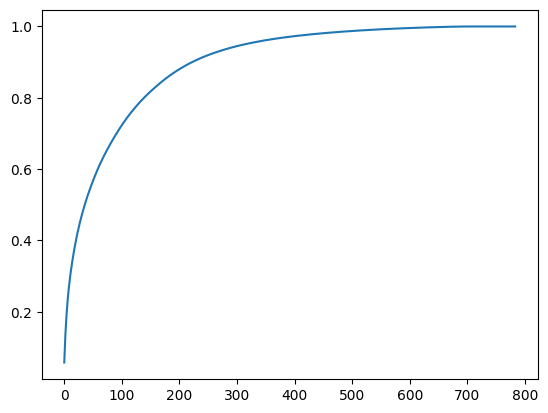

In [33]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [34]:
 # PCA doesn't work on : circle, specific patterns